In [327]:
import seaborn as sns;
import pandas as pd;
from sklearn.ensemble import RandomForestClassifier as RF
sns.set

# charger le dataset
wine = pd.read_csv(r"/content/winequality-white.csv", sep=';')
wine_df = wine

In [371]:
wine_df = wine

In [373]:
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [374]:
Y = wine_df['quality'].astype('category').cat.codes
Y

0       3
1       3
2       3
3       3
4       3
       ..
4893    3
4894    2
4895    3
4896    4
4897    3
Length: 4898, dtype: int8

In [375]:
X = wine_df.drop(['quality'], axis = 1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [333]:
from sklearn.model_selection import train_test_split

splits = train_test_split(X,Y,
                          train_size = 0.3,
                          stratify = Y,
                          random_state=2)

for each in splits:
  print(each.shape)
X_train, X_test, Y_train, Y_test = splits

(1469, 11)
(3429, 11)
(1469,)
(3429,)


In [334]:
def accuracy(preds, Y):
  return ((preds == Y).sum() / len(Y)* 100)

# **KNN méthode**

In [335]:
def trainingKNN (n_neighbors):
  knn = KNN(n_neighbors=n_neighbors)
  knn.fit(X_train,Y_train)
  prediction = knn.predict(X_test)
  print(prediction.shape)
  print(prediction)
  print('L\'algorithme KNeighborsClassifier avec n_neighbors =' , n_neighbors , 'est précis à ', accuracy(prediction,Y_test), '%')
  return prediction



In [342]:
prediction = trainingKNN(1)

(3429,)
[4 4 1 ... 2 1 3]
L'algorithme KNeighborsClassifier avec n_neighbors = 1 est précis à  47.82735491396909 %


In [343]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,prediction)

array([[  0,   4,   3,   6,   1,   0,   0],
       [  1,  18,  46,  37,  11,   1,   0],
       [  4,  36, 466, 403,  90,  19,   2],
       [  2,  34, 356, 854, 244,  48,   1],
       [  0,  13,  78, 230, 267,  27,   1],
       [  0,   0,  16,  47,  25,  35,   0],
       [  0,   0,   1,   2,   0,   0,   0]])

# **SVC méthode**

In [344]:
from sklearn.svm import SVC

In [345]:
svc = SVC(gamma='auto')

def trainingSVC():
  svcTrained = svc.fit(X_train,Y_train)
  prediction = svcTrained.predict(X_test)
  print(prediction)
  print('L\'algorithme Support Vector Classification est précis à ', accuracy(prediction,Y_test), '%')
  return prediction

In [346]:
trainingSVC()

[4 3 3 ... 2 3 3]
L'algorithme Support Vector Classification est précis à  50.014581510644504 %


array([4, 3, 3, ..., 2, 3, 3], dtype=int8)

In [347]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,prediction)

array([[  0,   4,   3,   6,   1,   0,   0],
       [  1,  18,  46,  37,  11,   1,   0],
       [  4,  36, 466, 403,  90,  19,   2],
       [  2,  34, 356, 854, 244,  48,   1],
       [  0,  13,  78, 230, 267,  27,   1],
       [  0,   0,  16,  47,  25,  35,   0],
       [  0,   0,   1,   2,   0,   0,   0]])

# **Méthode Regression logistique**

In [348]:
from sklearn.linear_model import LogisticRegression as LG

In [353]:
lg = LG(random_state=0, C=1e5, max_iter=100000)

def trainingLG():
  lg = LG(random_state=0, C=1e5, max_iter=100000)
  lgTrained = lg.fit(X_train,Y_train)
  prediction = lgTrained.predict(X_test)
  acc = accuracy(prediction,Y_test)
  print(prediction)
  print('L\'algorithme Support Vector Classification est précis à ', acc, '%')
  return prediction

In [354]:
trainingLG()

[3 3 3 ... 2 2 2]
L'algorithme Support Vector Classification est précis à  52.610090405365995 %


array([3, 3, 3, ..., 2, 2, 2], dtype=int8)

In [356]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,prediction)

array([[  0,   4,   3,   6,   1,   0,   0],
       [  1,  18,  46,  37,  11,   1,   0],
       [  4,  36, 466, 403,  90,  19,   2],
       [  2,  34, 356, 854, 244,  48,   1],
       [  0,  13,  78, 230, 267,  27,   1],
       [  0,   0,  16,  47,  25,  35,   0],
       [  0,   0,   1,   2,   0,   0,   0]])

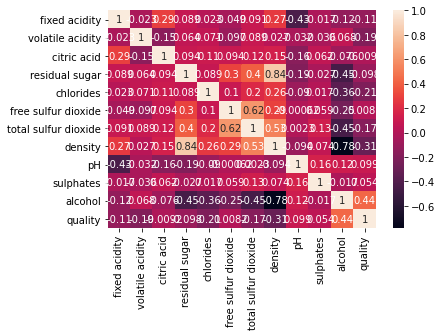

In [376]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
wine_df = wine_df.corr()

sns.heatmap(wine_df, 
        xticklabels=wine_df.columns,
        yticklabels=wine_df.columns,
        annot=True)